
# Project: Analysis of health expenditure economics around the world.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I am Renjini Ramadasan Nair. This is a data analysis project I have written in Python using Numpy, Pandas, Matplotlib and Scikit-learn. This project analyzes the health expenditure statistics across the world, from 1995 to 2010. The data were taken from the Gapminder Health Economics datasets https://www.gapminder.org/data/. The datasets for the percentage contributions from the government and private insurance companies (which includes the individual out-of-pocket), the per person governement expediture and the governmental healthcare input (as a percentage of total government spending) were downloaded. 

The relevant questions based on preliminary data analysis are as follows: 

1) Has the percentage of government contribution to healthcare changed in the 16 years? <br>
2) How do different countries handle health care expenditure? <br>
3) Is the government contribution (percentage and per person) higher in the developed countries? <br>
4) Of the total government expenditure, does the healthcare cost differ between developed countries and the rest? Has it changed over the years? <br>

The countries were classified into developed and rest as per the World Factbook by CIA (based on 2010-GDP per capita) [https://www.cia.gov/library/publications/the-world-factbook/appendix/appendix-b.html], and the trends characterized. The contribution by the government was further correlated with countries's health expenditure per person and total government expenditure. 


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

#### The dataframe names relate to actual data as follows:

private_share: The percentage shared by the private entitiies (insurance companies and pateints/families). <br>
gov_share: The percentage of health expenditure contributed by the government. <br>
gov_per_person: The average government spending per person for the year, in international dollars. <br>
gov_expenditure: The health care expenditure by the government as a percentage of the total expenditure per year. <br>
developed: List of developed countries. <br>



In [51]:
# Load the data 

private_share = pd.read_csv('private_share_of_total_health_spending_percent.csv')
gov_share = pd.read_csv('government_share_of_total_health_spending_percent.csv')
gov_per_person = pd.read_csv('government_health_spending_per_person_international_dollar.csv')
gov_expenditure = pd.read_csv('government_health_spending_of_total_gov_spending_percent.csv')
developed = pd.read_csv('developed.csv')

In [52]:
# Check the data for missing values or other formatting to be fixed.

private_share.info()
# gov_share.info()
# gov_per_person.info()
# gov_expenditure.info()
#private_share.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 17 columns):
geo     190 non-null object
1995    187 non-null float64
1996    188 non-null float64
1997    188 non-null float64
1998    189 non-null float64
1999    189 non-null float64
2000    189 non-null float64
2001    189 non-null float64
2002    188 non-null float64
2003    188 non-null float64
2004    188 non-null float64
2005    188 non-null float64
2006    188 non-null float64
2007    188 non-null float64
2008    188 non-null float64
2009    188 non-null float64
2010    185 non-null float64
dtypes: float64(16), object(1)
memory usage: 25.3+ KB


There are 190 rows and 17 columns for each of the expenditure dataframes. All have a few missing values, which need to be cleaned. The dataframes also need to be merged to make the analyses easier. The developed countries's list is a clean dataframe, which needs to be integrated as a Yes/No column to the final dataframe.  

In [53]:
# Drop rows with missing values
private_share.dropna(inplace = True, axis = 0)
gov_share.dropna(inplace = True, axis = 0)
gov_per_person.dropna(inplace = True, axis = 0)
gov_expenditure.dropna(inplace = True, axis = 0)
gov_share.head()

,geo,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
1,Albania,50.0,39.6,39.2,39.5,43.3,36.1,38.2,36.1,35.9,39.7,40.2,39.4,38.2,39.6,41.2,39.0
2,Algeria,75.4,77.6,74.3,73.8,72.8,73.3,77.4,77.3,78.7,71.1,72.1,74.4,77.3,79.5,79.3,77.9
3,Andorra,64.4,65.2,66.2,72.0,66.2,64.8,68.8,68.8,68.6,69.2,69.1,70.4,69.8,69.9,70.1,70.1
4,Angola,86.8,76.9,77.9,73.0,74.2,79.2,85.5,78.8,81.1,76.0,74.5,79.3,80.2,84.3,89.9,82.5
5,Antigua and Barbuda,66.5,64.2,66.0,68.0,69.3,69.0,65.5,65.2,64.2,63.4,63.1,65.7,66.4,67.9,67.1,71.0


In [54]:
# Check whether there are duplicate rows.
sum(gov_share.duplicated())

0

In [55]:
# Check whether the rows are similar between the dataframes.
private_share.columns[0] == gov_share.columns[0] == gov_per_person.columns[0] == gov_expenditure.columns[0]

True

In [56]:
gov_share.shape

(182, 17)

<a id='eda'></a>
## Exploratory Data Analysis

### Q1. Has the percentage of government contribution to healthcare changed in the 16 years? 

In [57]:
# Take a global average for every year and create a bar plot.
gov_annual_avg = gov_share.iloc[:, 1:17].mean()
gov_annual_avgerr = gov_share.iloc[:, 1:17].sem()

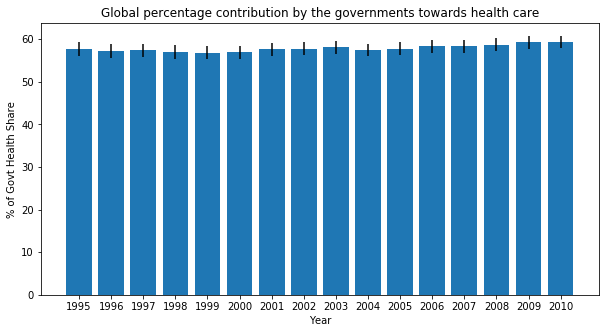

In [58]:
f, ax = plt.subplots(figsize=(10,5))
fig1 = plt.bar(gov_share.columns[1:17], gov_annual_avg, yerr = gov_annual_avgerr)
plt.xlabel ('Year')
plt.ylabel('% of Govt Health Share')
plt.title('Global percentage contribution by the governments towards health care')
fig1;


There does not seem to be a significant variation in the global average health share contribution by the government over the years.

### Q2. How do different countries handle health care expenditure?

In [59]:
# Write a function to calculate the mean and standard error for each country, over the years.
def col_mean(mean, df):
    for col in df.columns:
        df[mean] = df.iloc[: , 1:17].mean(axis=1)
col_mean('mean_gov', gov_share)
gov_share.head()

,geo,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,mean_gov
1,Albania,50.0,39.6,39.2,39.5,43.3,36.1,38.2,36.1,35.9,39.7,40.2,39.4,38.2,39.6,41.2,39.0,39.70000
2,Algeria,75.4,77.6,74.3,73.8,72.8,73.3,77.4,77.3,78.7,71.1,72.1,74.4,77.3,79.5,79.3,77.9,75.76250
3,Andorra,64.4,65.2,66.2,72.0,66.2,64.8,68.8,68.8,68.6,69.2,69.1,70.4,69.8,69.9,70.1,70.1,68.35000
4,Angola,86.8,76.9,77.9,73.0,74.2,79.2,85.5,78.8,81.1,76.0,74.5,79.3,80.2,84.3,89.9,82.5,80.00625
5,Antigua and Barbuda,66.5,64.2,66.0,68.0,69.3,69.0,65.5,65.2,64.2,63.4,63.1,65.7,66.4,67.9,67.1,71.0,66.40625


In [60]:
# Calculate the mean private share percentage for each country, over the years.
col_mean('mean_private', private_share)
private_share.head()

,geo,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,mean_private
1,Albania,50.0,60.4,60.8,60.5,56.7,63.9,61.8,63.9,64.1,60.3,59.8,60.6,61.8,60.4,58.8,61.0,60.30000
2,Algeria,24.6,22.4,25.6,26.2,27.1,26.7,22.6,22.7,21.3,28.9,27.9,25.6,22.7,20.5,20.7,22.1,24.22500
3,Andorra,35.6,34.8,33.8,28.0,33.9,35.2,31.3,31.2,31.4,30.8,30.9,29.6,30.2,30.1,29.9,29.9,31.66250
4,Angola,13.2,23.1,22.1,26.9,25.8,20.8,14.5,21.1,18.9,24.0,25.5,20.7,19.8,15.7,10.1,17.5,19.98125
5,Antigua and Barbuda,33.5,35.8,34.0,32.0,30.7,31.0,34.5,34.8,35.8,36.6,36.9,34.3,33.6,32.1,32.9,29.0,33.59375


In [61]:
# Check whether the sum of government share and private share is approximately equal to 100 (between 99 and 101).
((private_share['mean_private'] + gov_share['mean_gov'] >= 99) | (private_share['mean_private'] + gov_share['mean_gov']<= 101)).any()

True

In [62]:
# Merge the government and private share dataframes into one, retaining the country and mean columns only.
gov = gov_share.drop(gov_share.columns[1:17], axis = 1)
# Write a function to left-merge dataframes
def dfmerge(left, right, rightcol):
    global merged
    merged = pd.merge(left, right[['geo', rightcol]], on = 'geo', how = 'left')
    return merged
dfmerge(gov, private_share, 'mean_private')
merged.head()


,geo,mean_gov,mean_private
0,Albania,39.70000,60.30000
1,Algeria,75.76250,24.22500
2,Andorra,68.35000,31.66250
3,Angola,80.00625,19.98125
4,Antigua and Barbuda,66.40625,33.59375


In [63]:
# Calculate the ratio of government/private cost share.
merged['share_ratio'] = merged['mean_gov']/merged['mean_private']
merged.head()

,geo,mean_gov,mean_private,share_ratio
0,Albania,39.70000,60.30000,0.658375
1,Algeria,75.76250,24.22500,3.127451
2,Andorra,68.35000,31.66250,2.158705
3,Angola,80.00625,19.98125,4.004066
4,Antigua and Barbuda,66.40625,33.59375,1.976744


In [64]:
#developed.head()
developed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 1 columns):
geo    33 non-null object
dtypes: object(1)
memory usage: 344.0+ bytes


In [65]:
# Add the column to state whether the country is classified as developed or not
merged['developed'] = np.nan
devel = developed.geo.tolist()
#len(devel)
#sum(merged['geo'].isin(devel))
merged['developed'] = np.where(merged['geo'].isin(devel), 1, 0)

In [66]:
# Remove one country with a very high ratio
merged = merged[merged['share_ratio']< 100]
merged.head()

,geo,mean_gov,mean_private,share_ratio,developed
0,Albania,39.70000,60.30000,0.658375,0
1,Algeria,75.76250,24.22500,3.127451,0
2,Andorra,68.35000,31.66250,2.158705,0
3,Angola,80.00625,19.98125,4.004066,0
4,Antigua and Barbuda,66.40625,33.59375,1.976744,0


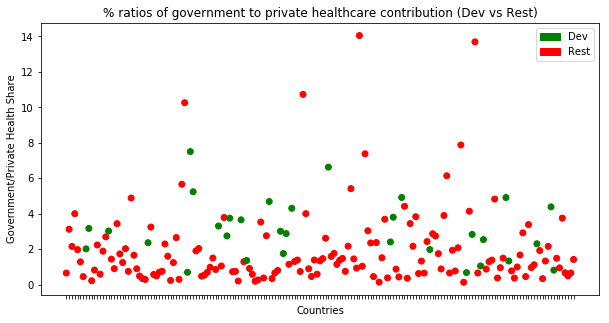

In [67]:
def scatter_plot(ycol): 
    colors = {1: 'green', 0: 'red'}
    f, ax = plt.subplots(figsize=(10,5))
    plt.scatter(merged['geo'], ycol, c=merged.developed.map(colors))
    plt.xlabel("Countries")
    ax.set_xticklabels([])
    green_patch = mpatches.Patch(color='green', label='Dev')
    red_patch = mpatches.Patch(color='red', label='Rest')
    patches = [green_patch, red_patch]
    legend = ax.legend(handles=patches,loc='upper right')
    
scatter_plot(merged['share_ratio'])
plt.ylabel("Government/Private Health Share")
plt.title ('% ratios of government to private healthcare contribution (Dev vs Rest)')
plt.show();

The government and private sectors share the expenditure in different countries. The extent or ratio of the 2 types of contributions vary between the countries. Let us look at how the variation is between developed countries with a high GDP, and the rest. 

### Q3. Is the government contribution (percentage and per person) higher in the developed countries?
 

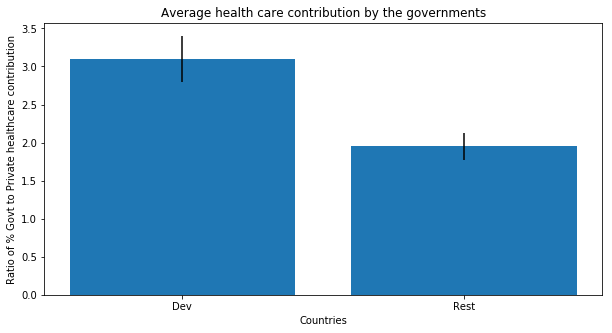

In [68]:
# Plot the means of percentage healthcare contributions by the governments, sorted by developed versus rest of the countries.
# Function to draw a barplot with errorbars.
def newplot(ycol):
    f, ax = plt.subplots(figsize=(10,5))
    dev = (ycol[merged['developed']==1]).mean()
    deverr = (ycol[merged['developed']==1]).sem() 
    rest = (ycol[merged['developed']==0]).mean()
    resterr = (ycol[merged['developed']==0]).sem()
    err = (deverr, resterr)
    locations = ['Dev', 'Rest']
    heights = [dev, rest]
    plt.bar(locations, heights, yerr = err)
    plt.xlabel('Countries')
newplot(merged.share_ratio)
plt.ylabel('Ratio of % Govt to Private healthcare contribution')
plt.title('Average health care contribution by the governments')
plt.show();


In [69]:
# To plot the per person governmental input, calculate the mean governmental per person appending for each country, over the years.
col_mean('mean_gov_person', gov_per_person)

In [70]:
# Merge the gov_per_person expenditure into the main dataframe, retaining the country and mean columns only.
dfmerge(merged, gov_per_person, 'mean_gov_person')
#merged.info()
merged.head()

,geo,mean_gov,mean_private,share_ratio,developed,mean_gov_person
0,Albania,39.70000,60.30000,0.658375,0,133.95625
1,Algeria,75.76250,24.22500,3.127451,0,180.06250
2,Andorra,68.35000,31.66250,2.158705,0,1626.68750
3,Angola,80.00625,19.98125,4.004066,0,79.52500
4,Antigua and Barbuda,66.40625,33.59375,1.976744,0,454.56250


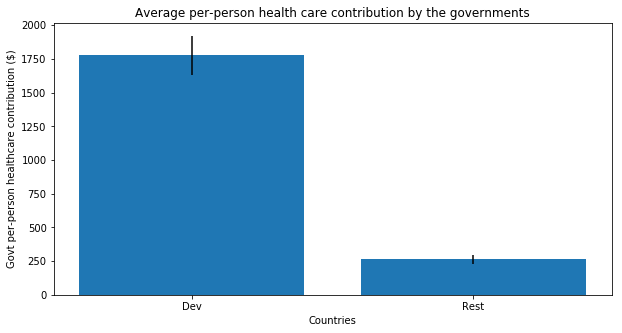

In [71]:
# Plot the per_person healthcare contributions by the governments, sorted by developed versus rest of the countries.
newplot(merged.mean_gov_person)
plt.ylabel('Govt per-person healthcare contribution ($)')
plt.title('Average per-person health care contribution by the governments');


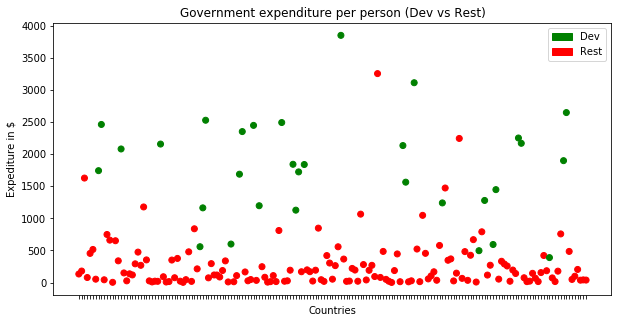

In [72]:
scatter_plot(merged['mean_gov_person'])
plt.ylabel("Expediture in $")
plt.title ('Government expenditure per person (Dev vs Rest)')
plt.show();

The government expenditure compared to the contribution by private sectors is higher in the developed countries. The per_person governmental contribution is considerably higher in the developed coountries compared to the rest of the countries. 

In [73]:
merged.query('developed == 1 & mean_gov_person >= 400').count()
merged.query('developed == 0 & mean_gov_person < 200').count()

geo                96
mean_gov           96
mean_private       96
share_ratio        96
developed          96
mean_gov_person    96
dtype: int64

#### Is it possible to create a supervised learning model to classify the countries based on this data?

In [74]:
# Since the number of developed countries is , I selected the rest countries with mean_gov_person expenditure less than $200, along with the developed countries to create a toy dataset. 
# ml_df = merged[((merged['developed'] == 1) & (merged['mean_gov_person'] >= 300) | (merged['developed'] == 0) & (merged['mean_gov_person'] < 200))][['mean_gov_person', 'share_ratio', 'developed']]
ml_df = merged[((merged['developed'] == 1) | ((merged['developed'] == 0) & (merged['mean_gov_person'] < 200)))][['mean_gov_person', 'share_ratio', 'developed']]
ml_df.shape

(127, 3)

In [75]:
ml_df.head()

,mean_gov_person,share_ratio,developed
0,133.95625,0.658375,0
1,180.06250,3.127451,0
3,79.52500,4.004066,0
6,53.53750,0.456225,0
7,1741.87500,2.021907,1


In [76]:
# Function to standardize the columns
from sklearn.preprocessing import *
def norm(col): 
    x = np.array(col).astype(float)
    X = pd.DataFrame(x)
    y = StandardScaler().fit(X).transform(X)
    return y
# Normalize the share_ratio column
col = ml_df['share_ratio']
ml_df['share_ratio'] = norm(col)

In [77]:
# Normalize the mean_gov_person column
col = ml_df['mean_gov_person']
ml_df['mean_gov_person'] = norm(col)
ml_df.head()

,mean_gov_person,share_ratio,developed
0,-0.426869,-0.598843,0
1,-0.371423,0.663309,0
3,-0.492327,1.111421,0
6,-0.523579,-0.702179,0
7,1.506773,0.098173,1


In [78]:
# Use a logistic regression algorithm to train and test the data
X = ml_df[['mean_gov_person', 'share_ratio']]
y = ml_df['developed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

/home/renjini/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [79]:
# Check the statistical performance of the algorithm
print("Precision_score = %.2f" % precision_score(y_test, y_preds))
print("Recall_score = %.2f" % recall_score(y_test, y_preds))
print("Accuracy_score = %.2f" % accuracy_score(y_test, y_preds))
print("Confusion_matrix:  ")
print(confusion_matrix(y_test, y_preds))

Precision_score = 0.89
Recall_score = 0.89
Accuracy_score = 0.94
Confusion_matrix:  
[[44  2]
 [ 2 16]]


### Of the total government expenditure, does the healthcare cost differ between developed countries and the rest? Has it changed over the years?

In [80]:
# Calculate the mean governmental expenditure (as a percent of total government expediture), appending for each country, over the years.
col_mean('mean_gov_expenditure', gov_expenditure )

In [81]:
# Merge the gov_expenditure into the main dataframe, retaining the country and mean columns only.
dfmerge(merged, gov_expenditure, 'mean_gov_expenditure')
# merged.info()
merged.head()

,geo,mean_gov,mean_private,share_ratio,developed,mean_gov_person,mean_gov_expenditure
0,Albania,39.70000,60.30000,0.658375,0,133.95625,7.635000
1,Algeria,75.76250,24.22500,3.127451,0,180.06250,8.878125
2,Andorra,68.35000,31.66250,2.158705,0,1626.68750,22.068750
3,Angola,80.00625,19.98125,4.004066,0,79.52500,4.877500
4,Antigua and Barbuda,66.40625,33.59375,1.976744,0,454.56250,10.926250


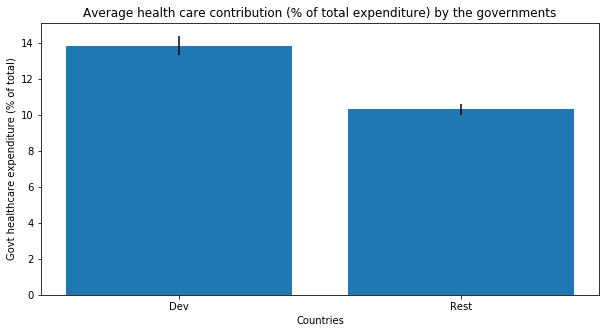

In [82]:
# Plot the mean governmental expenditure (as a percent of total government expediture), sorted by developed versus rest of the countries.
newplot(merged.mean_gov_expenditure)
plt.ylabel('Govt healthcare expenditure (% of total)')
plt.title('Average health care contribution (% of total expenditure) by the governments');


Even though there is a trend for increase in the percentage invested in healthcare compared to total government expenditure for the developed countries, the change is by a small factor (14% in developed and 11% in the rest). 

<a id='conclusions'></a>
## Conclusions

The mean global contribution by the different national governments towards health care has not changed much in the 16 years analyzed. In all countries, the government and the private sector share the healthcare costs. I found that the countries with a higher GDP have a higher contribution by the governments, when compared to the rest of the world. Average per person contribution in dollars is also considerably higher in the developed countries. The governement/private share ratio and the governemental per person expenditure could be used to classify the test set of countries as developed and rest. Analysis of the percentage spent by the national governments in healthcare compared to total expenditure, I found that the averages did not differ much between the developed countries and the rest of the world. This implies that while comparatively the developed national governments spend more absolute money on healthcare, the rest of the world spends a near equal percentage of total expenditure on healthcare. I created a toy dataset consisting of countries with government-per-person expenditure less than $200, along with the developed countries. Using logistic regression, I found that the supervised learning model based on the governement/private share-ratio and governement-per-person expenditure attributes, could classify the countries into developed and rest with an accuracy of approximately 95%. 


## Limitations

Further statistical analyses using significance tests (T-tests or ANOVA) is required to define the statistical significance of the findings. The GDP or economic status of the countries are not available. It would have been more useful for this type of an analysis if the rest countries could be sorted into those with median (developing), low (undeveloped) or very low (underdeveloped) GDP. There were missing data for some countries, which were excluded from analyses. Hence, this is not a complete representation of the world. If the data were available until the latest update (last year), it would have been a better representation of the current global situation. 

